# Xns11 examples

#### Opening files and finding cross sections.

In [1]:
# Open an xns11 file by first importing Xns11, then creating an object with the file path.

from mikeio1d import Xns11
xns = Xns11("../tests/testdata/mikep_cs_demo.xns11")
xns

<mikeio1d.Xns11>

In [2]:
# Print some basic information about the file.
xns.info()

# Cross sections: 103
Interpolation type: ProcessedTopDown


In [3]:
# An xns11 file containes many cross sections acessible via the 'xsections' attribute.
xns.xsections

<CrossSectionCollection 103>

In [4]:
# You can index specific cross sections using their location id, chainage, and topo id.
# For example, to access the cross section at location 'basin_left1', chainage '122.042', and topo id '1':
xns.xsections['basin_left1','122.042','1']

<CrossSection: basin_left1, 122.042, 1>

In [5]:
# Use '...' as a wildcard to get a CrossSectionCollection matching the specified criteria.
xns.xsections['basin_left1', ..., '1']

<CrossSectionCollection 12>

In [6]:
# You can also provide fewer arguments and the remaining ones will automatically use '...'.
# For example, xns.xsections['basin_left1', ..., ...] can be more concisely expressed as:
xns.xsections['basin_left1']

<CrossSectionCollection 12>

In [7]:
# You can also use the 'sel' method for explicit keyword arguments (however without autocompletion).
xns.xsections.sel(chainage='122.042')

<CrossSectionCollection 1>

In [8]:
# xsections is also 'dict-like', meaning you can work with it like a dictionary. For example, you can combine two collections:

new_collection = xns.xsections['basin_left1']
print("Collection #1:", new_collection)

new_collection.update(xns.xsections['basin_left2'])
print("Collection #2:", new_collection)

Collection #1: <CrossSectionCollection 12>
Collection #2: <CrossSectionCollection 20>


In [9]:
# Get a nice overview of the collection as a pandas DataFrame.
new_collection.to_dataframe()

cross_section
location_id chainage topo_id                                         
basin_left1 2.004    1          <CrossSection: basin_left1, 2.004, 1>
            33.774   1         <CrossSection: basin_left1, 33.774, 1>
            80.945   1         <CrossSection: basin_left1, 80.945, 1>
            122.042  1        <CrossSection: basin_left1, 122.042, 1>
            166.107  1        <CrossSection: basin_left1, 166.107, 1>
            184.886  1        <CrossSection: basin_left1, 184.886, 1>
            210.212  1        <CrossSection: basin_left1, 210.212, 1>
            264.614  1        <CrossSection: basin_left1, 264.614, 1>
            284.638  1        <CrossSection: basin_left1, 284.638, 1>
            341.152  1        <CrossSection: basin_left1, 341.152, 1>
            413.617  1        <CrossSection: basin_left1, 413.617, 1>
            481.451  1        <CrossSection: basin_left1, 481.451, 1>
basin_left2 29.194   1         <CrossSection: basin_left2, 29.194, 1>
            94.137   1         <CrossSection: basin_left2, 94.137, 1>
            159.062  1        <CrossSection: basin_left2, 159.062, 1>
            214.431  1        <CrossSection: basin_left2, 214.431, 1>
            281.473  1        <CrossSection: basin_left2, 281.473, 1>
            341.557  1        <CrossSection: basin_left2, 341.557, 1>
            398.991  1        <CrossSection: basin_left2, 398.991, 1>
            434.188  1        <CrossSection: basin_left2, 434.188, 1>

In [10]:
# You can access some basic properties of the collection:
print(new_collection.location_ids)
print(new_collection.chainages)
print(new_collection.topo_ids)

['basin_left1', 'basin_left2']
['398.991', '210.212', '33.774', '264.614', '341.557', '413.617', '29.194', '281.473', '481.451', '159.062', '2.004', '341.152', '214.431', '434.188', '284.638', '80.945', '184.886', '166.107', '94.137', '122.042']
['1']


### Reading and plotting cross sections

In [11]:
# Read a cross section into a pandas DataFrame.
df = xns.xsections['basin_left1','481.451','1'].read()
df.head()

,markers,marker_labels,x,z
0,1,Left Levee Bank (1),0.000,60.049
1,,,0.999,59.997
2,,,1.998,59.957
3,,,2.997,59.918
4,,,3.996,59.862


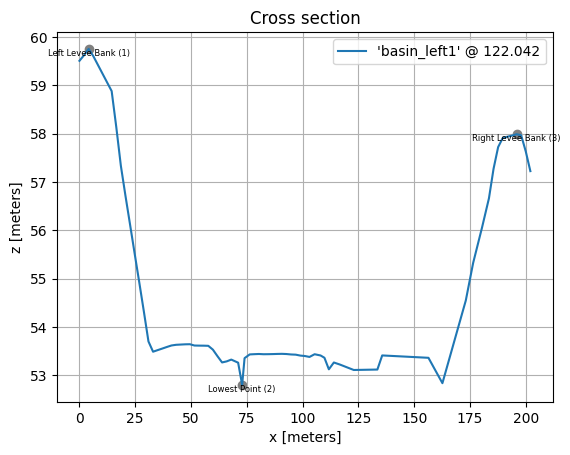

In [12]:
# Plot the cross section.
ax = xns.xsections['basin_left1','122.042','1'].plot()

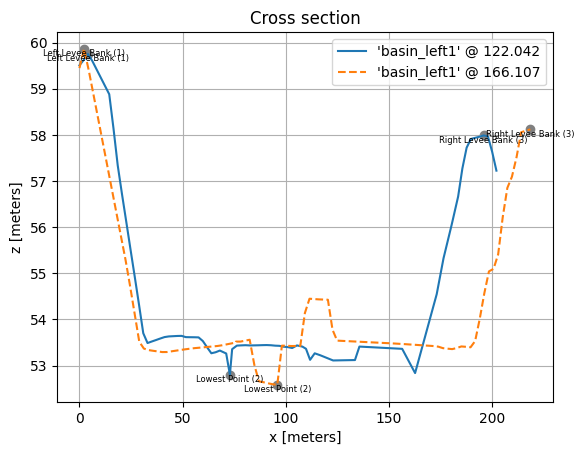

In [13]:
# Plot another cross section on the same axis.
ax = xns.xsections['basin_left1','166.107', '1'].plot(ax=ax, linestyle='--')
ax.figure

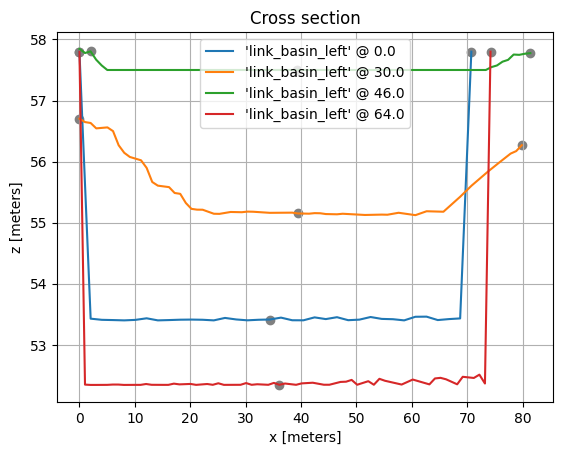

In [14]:
# Turn off marker labels if it gets too crowded.
ax = xns.xsections['link_basin_left'].plot(with_marker_labels=False)

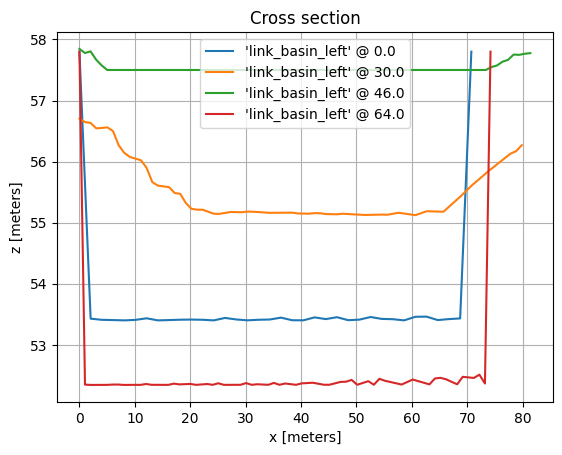

In [15]:
# Or turn off markers completely.
ax = xns.xsections['link_basin_left'].plot(with_markers=False)

### Plotting cross sections with GeoPandas

<Axes: >

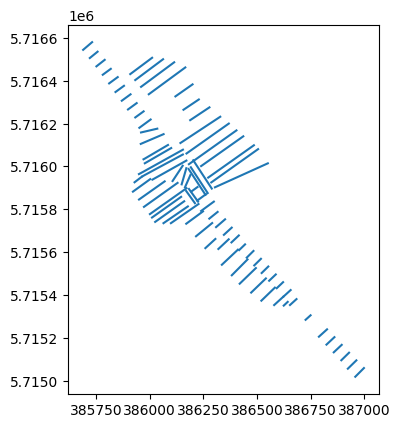

In [16]:
# You can convert xsections into a GeoDataframe. Note that this requires installation of geopandas.
gdf = xns.xsections.to_geopandas()
gdf.plot()

<Axes: >

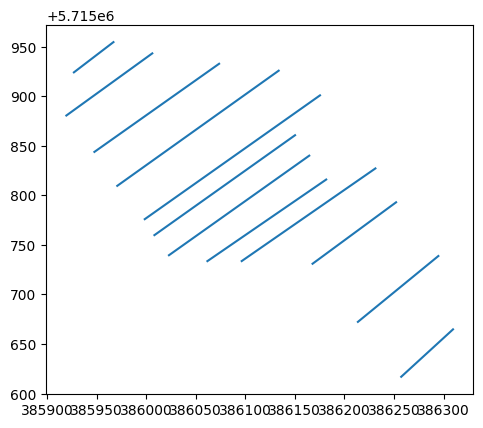

In [17]:
# You can use convert any CrossSectionCollection to a GeoDataFrame.
xns.xsections['basin_left1'].to_geopandas().plot()

<Axes: >

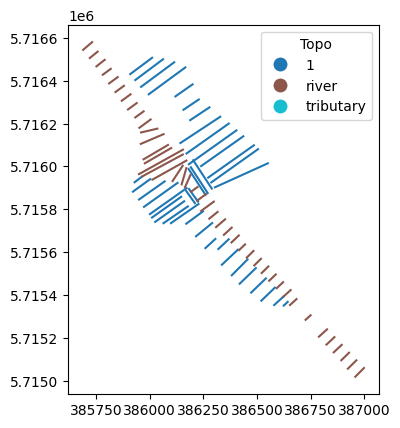

In [18]:
# This xns11 file has three topo ids, let's get an overview of where they are located.
gdf = xns.xsections.to_geopandas()
gdf.plot(column='topo_id', legend=True, legend_kwds={'title': 'Topo'})

In [19]:
# You can check for overlapping cross sections by seeing if there's duplicate geometries.
# Here there's no duplicates, however, we notice a number of cross sections have no coordinates.
gdf[gdf.geometry.duplicated()]

,location_id,chainage,topo_id,geometry
37,link_basin_left,64.000,1,LINESTRING EMPTY
38,link_basin_right,0.000,1,LINESTRING EMPTY
39,link_basin_right,18.000,1,LINESTRING EMPTY
43,link_basin_right,80.400,1,LINESTRING EMPTY
45,river,53126.750,river,LINESTRING EMPTY
46,river,53128.000,river,LINESTRING EMPTY
81,river,54715.000,river,LINESTRING EMPTY
83,river,54800.000,river,LINESTRING EMPTY
84,river,54812.900,river,LINESTRING EMPTY
91,tributary,50.000,tributary,LINESTRING EMPTY
